# FISH FRY COUNTER TRAINING
Developed by: John Markton M. Olarte

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Training Methodology
1. Load Images
2. Preprocess Images (Grayscale, Crop, Gaussian Blur, Remove Background Image Data, OTSU Threshold)
3. Count White Pixels

In [2]:
# Function for opening image
def get_img(img_path, grayscale=True):
    img = cv.imread(img_path)
    if grayscale:
        return cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

In [3]:
# Function for cropping image
def crop_img(img):
    img_centerX = img.shape[1] // 2
    img_centerY = img.shape[0] // 2

    # Initialize mask to use
    mask = np.zeros(img.shape, dtype=np.uint8)

    # Crop the image
    region_to_cut = cv.ellipse(mask, (img_centerX, img_centerY), (547, 547), 0, 0, 360, 255, -1)
    cropped_img = cv.bitwise_or(img, img, mask=region_to_cut)
    return cropped_img[:, img_centerX-600:img_centerX+600]

In [4]:
# Gaussian Blur Function
def gaussian_blur(img, kernel_a, kernel_b):
    return cv.GaussianBlur(img, (kernel_a, kernel_b), 0)

In [5]:
# Remove the background from the fry image
def img_diff(img, bg_img):
    return cv.absdiff(img, bg_img)

In [6]:
# Image Segmentation Using Thresholding Function
def threshold_img(diff_img, type='OTSU', block=0, c=0):
    if type == 'OTSU':
        _, thresh_img = cv.threshold(diff_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        return thresh_img
    return cv.adaptiveThreshold(diff_img, 256, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block, c)

In [7]:
# Histogram Counter
def histogram_counter(thres_img, pixel_to_count='white'):
    if pixel_to_count == 'white':
        return np.count_nonzero(thres_img == 255)
    return np.count_nonzero(thres_img == 0)

In [8]:
# Countour Detection
def contour_detection(thres_img):
    contours, _ = cv.findContours(thres_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours

## Find the Pixel Count Boundaries

In [9]:
# Path to the images (100)
path = '../IMAGES/100/'
list_images_100 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_100 = [path + f for f in list_images_100]

# Path to the images (200)
path = '../IMAGES/200/'
list_images_200 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_200 = [path + f for f in list_images_200]

# Path to the images (300)
path = '../IMAGES/300/'
list_images_300 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_300 = [path + f for f in list_images_300]

# Path to the images (400)
path = '../IMAGES/400/'
list_images_400 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_400 = [path + f for f in list_images_400]

In [10]:
df = pd.DataFrame(columns=['white_pixels', 'contour', 'label'])
os.makedirs('./exported_df', exist_ok=True)

In [11]:
block, c = 37, 5

In [12]:
# Image with 100
df_100 = df.copy()
for img_path in list_paths_100:
    img = get_img(img_path)
    bg_img = get_img('../IMAGES/100/background.jpg')

    # Crop the image
    img = crop_img(img)
    bg_img = crop_img(bg_img)

    # Image Difference
    diff_img = img_diff(img, bg_img)

    # Adaptive Gaussian Threshold
    thres_img = threshold_img(diff_img, type="ADAPTIVE", block=block, c=c)

    # Contour Detection
    contours = contour_detection(thres_img)

    df_100 = pd.concat([df_100, pd.DataFrame({'white_pixels': [histogram_counter(thres_img)], 'contours': len(contours), 'label': [100]})], ignore_index=True)

df_100.to_csv('./exported_df/df_100.csv', index=False)

In [13]:
# Image with 200
df_200 = df.copy()
for img_path in list_paths_200:
    img = get_img(img_path)
    bg_img = get_img('../IMAGES/100/background.jpg')

    # Crop the image
    img = crop_img(img)
    bg_img = crop_img(bg_img)

    # Image Difference
    diff_img = img_diff(img, bg_img)

    # Adaptive Gaussian Threshold
    thres_img = threshold_img(diff_img, type="ADAPTIVE", block=block, c=c)
    # Contour Detection
    contours = contour_detection(thres_img)
    
    df_200 = pd.concat([df_200, pd.DataFrame({'white_pixels': [histogram_counter(thres_img)], 'contours': len(contours), 'label': [200]})], ignore_index=True)

df_200.to_csv('./exported_df/df_200.csv', index=False)

In [14]:
# Image with 300
df_300 = df.copy()
for img_path in list_paths_300:
    img = get_img(img_path)
    bg_img = get_img('../IMAGES/100/background.jpg')

    # Crop the image
    img = crop_img(img)
    bg_img = crop_img(bg_img)

    # Image Difference
    diff_img = img_diff(img, bg_img)

    # Adaptive Gaussian Threshold
    thres_img = threshold_img(diff_img, type="ADAPTIVE", block=block, c=c)

    # Contour Detection
    contours = contour_detection(thres_img)
    
    df_300 = pd.concat([df_300, pd.DataFrame({'white_pixels': [histogram_counter(thres_img)], 'contours': len(contours), 'label': [300]})], ignore_index=True)

df_300.to_csv('./exported_df/df_300.csv', index=False)

In [15]:
# Image with 400
df_400 = df.copy()
for img_path in list_paths_400:
    img = get_img(img_path)
    bg_img = get_img('../IMAGES/100/background.jpg')

    # Crop the image
    img = crop_img(img)
    bg_img = crop_img(bg_img)

    # Image Difference
    diff_img = img_diff(img, bg_img)

    # Adaptive Gaussian Threshold
    thres_img = threshold_img(diff_img, type="ADAPTIVE", block=block, c=c)

    # Contour Detection
    contours = contour_detection(thres_img)

    df_400 = pd.concat([df_400, pd.DataFrame({'white_pixels': [histogram_counter(thres_img)], 'contours': len(contours), 'label': [400]})], ignore_index=True)

df_400.to_csv('./exported_df/df_400.csv', index=False)

In [16]:
print('Minimum white_pixels: ', df_100['white_pixels'].min(), df_200['white_pixels'].min(), df_300['white_pixels'].min(), df_400['white_pixels'].min())
print('Maximum white_pixels: ', df_100['white_pixels'].max(), df_200['white_pixels'].max(), df_300['white_pixels'].max(), df_400['white_pixels'].max())
print('Minimum contours: ', df_100['contours'].min(), df_200['contours'].min(), df_300['contours'].min(), df_400['contours'].min())
print('Maximum contours: ', df_100['contours'].max(), df_200['contours'].max(), df_300['contours'].max(), df_400['contours'].max())

Minimum white_pixels:  1265864 1221275 1196588 1160103
Maximum white_pixels:  1270473 1229159 1216145 1172078
Minimum contours:  748.0 2233.0 2516.0 2982.0
Maximum contours:  893.0 2571.0 2955.0 3476.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

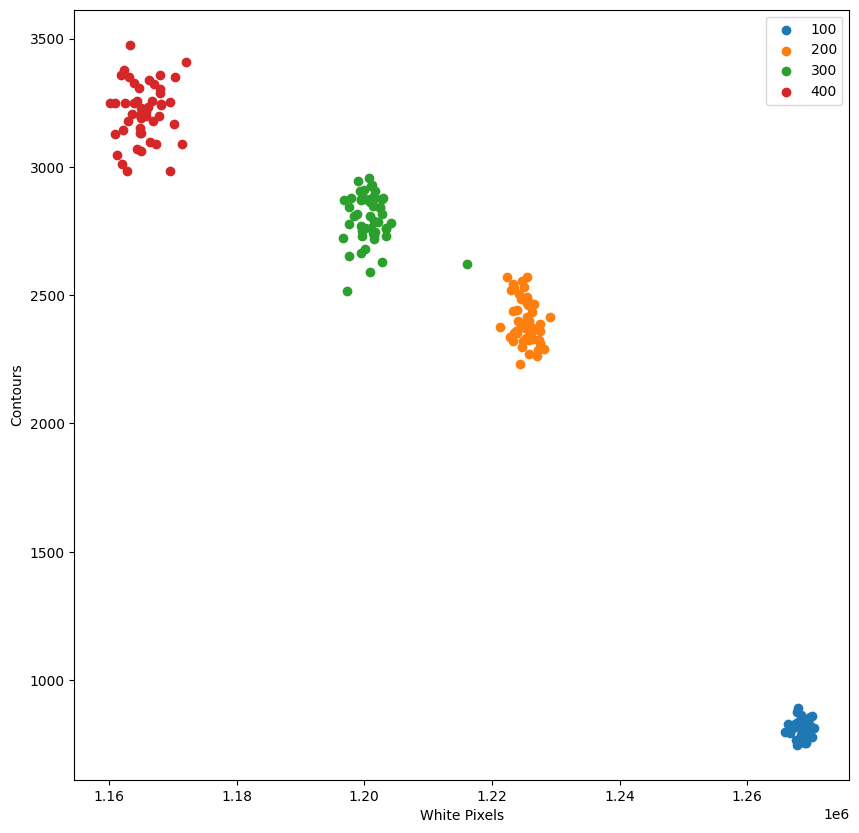

In [18]:
# Scatter Plot for the minimum and maximum white_pixels and contours for each label
plt.figure(figsize=(10, 10))
plt.scatter(df_100['white_pixels'], df_100['contours'], label='100')
plt.scatter(df_200['white_pixels'], df_200['contours'], label='200')
plt.scatter(df_300['white_pixels'], df_300['contours'], label='300')
plt.scatter(df_400['white_pixels'], df_400['contours'], label='400')
plt.xlabel('White Pixels')
plt.ylabel('Contours')
plt.legend()
plt.show()

In [19]:
# Check if there are overlapping points between the labels
points_100 = df_100[['white_pixels', 'contours']].values
points_200 = df_200[['white_pixels', 'contours']].values
points_300 = df_300[['white_pixels', 'contours']].values
points_400 = df_400[['white_pixels', 'contours']].values

overlap = []
for point in points_100:
    if point in points_200 or point in points_300 or point in points_400:
        overlap.append(point)

for point in points_200:
    if point in points_100 or point in points_300 or point in points_400:
        overlap.append(point)

for point in points_300:
    if point in points_100 or point in points_200 or point in points_400:
        overlap.append(point)

for point in points_400:
    if point in points_100 or point in points_200 or point in points_300:
        overlap.append(point)

print('Number of overlapping points: ', len(overlap))

Number of overlapping points:  0
